# Face Detection
## 1. Object Dection - Cascade Classifier(Viola-Jones)
## 2. Deep Neural Networks
## 3. 1+2


In [19]:
import cv2
import numpy as np
# GUI 만들기 위해 import 해줌
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog

face_cascade_name = 'C:/Users/User/Anaconda3/envs/test/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'C:/Users/User/Anaconda3/envs/test/Lib/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml'
file_name = "D:/opencv_dnn_202005/opencv_dnn_202005/video/obama_01.mp4"
title_name = 'Haar cascade object detection Video'
frame_width = 500
cap = cv2.VideoCapture()

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()
#-- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

# 파일 선택(동영상), 얼굴과 눈 찾는 코드 실행
def selectFile():
    file_name =  filedialog.askopenfilename(initialdir = "./video"
                                            ,title = "Select file",filetypes = (("MP4 files","*.mp4"),("all files","*.*")))
    print('File name : ', file_name)
    global cap
    cap = cv2.VideoCapture(file_name)
    detectAndDisplay()

# 얼굴과 눈 찾기(동영상)
def detectAndDisplay():
    _, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10, detectAndDisplay) 

#main
main = Tk()
main.title(title_name)
main.geometry()

#Graphics window
label=Label(main, text=title_name)
label.config(font=("Courier", 18))
label.grid(row=0,column=0,columnspan=4)
Button(main,text="File Select", height=2,command=lambda:selectFile()).grid(row=1, column=0, columnspan=4, sticky=(W, E))
imageFrame = Frame(main)
imageFrame.grid(row=2,column=0,columnspan=4)
  
#Capture video frames
lmain = Label(imageFrame)
lmain.grid(row=0, column=0)

main.mainloop()  #Starts GUI


File name :  D:/opencv_dnn_202005/opencv_dnn_202005/video/tedy_01.mp4


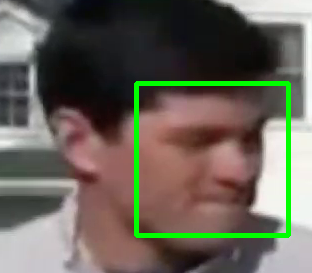